# ValueRise - Charlene Bui 

Analysis of the Shark Tank dataset to develop a model that can predict the Total Deal Amount based on various features such as the Original Ask Amount, Original Offered Equity, and the presence of specific Sharks

## Importing data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Load the data
data = pd.read_csv('Shark Tank US dataset.csv')

In [6]:
data

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,...,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present
0,1,AvaTheElephant,1,1,9-Aug-09,5-Feb-10,9-Aug-09,Health/Wellness,Ava The Elephant - Baby and Child Care,http://www.avatheelephant.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
1,1,Mr.Tod'sPieFactory,1,2,9-Aug-09,5-Feb-10,9-Aug-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,http://whybake.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
2,1,Wispots,1,3,9-Aug-09,5-Feb-10,9-Aug-09,Business Services,Wispots - Consumer Services,http://www.wispots.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
3,1,CollegeFoxesPackingBoxes,1,4,9-Aug-09,5-Feb-10,9-Aug-09,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,http://collegehunkshaulingjunk.com/,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
4,1,IonicEar,1,5,9-Aug-09,5-Feb-10,9-Aug-09,Software/Tech,Ionic Ear - Novelties,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,15,LadyAlpha,17,1340,29-Sep-23,NaN,8-Mar-24,Lifestyle/Home,Nursing cover,https://www.shopladyalpha.com/,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1341,15,NowhereBakery,18,1341,29-Sep-23,NaN,15-Mar-24,Food and Beverage,Healthy bakery,https://nowherebakery.com/,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0
1342,15,TheMurderMysteryCo,18,1342,29-Sep-23,NaN,15-Mar-24,Uncertain/Other,Murder mystery parties,https://www.murdermysteryco.com/,...,350000.0,10.0,Jason Blum,1.0,1.0,1.0,NaN,NaN,1.0,1.0
1343,15,Overplay,18,1343,29-Sep-23,NaN,15-Mar-24,Software/Tech,App for video game creation,https://overplay.com/,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0


## Data Preprocessing

In [3]:
# Select relevant features
features = ['Original Ask Amount', 'Original Offered Equity', 'Barbara Corcoran Present', 'Mark Cuban Present',
            'Lori Greiner Present', 'Robert Herjavec Present', 'Daymond John Present', 'Kevin O Leary Present']
target = 'Total Deal Amount'

In [4]:
# Split the data into features X and target y
X = data[features]
y = data[target]

In [5]:
# Handling Missing Values
imputer = SimpleImputer(strategy='mean')
X[['Original Ask Amount', 'Original Offered Equity']] = imputer.fit_transform(X[['Original Ask Amount', 'Original Offered Equity']])

C:\Users\charl\AppData\Local\Temp\ipykernel_25492\374593836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Original Ask Amount', 'Original Offered Equity']] = imputer.fit_transform(X[['Original Ask Amount', 'Original Offered Equity']])


In [6]:
# Impute missing values in the target variable with the mean
imputer_target = SimpleImputer(strategy='mean')
y = imputer_target.fit_transform(y.values.reshape(-1, 1)).ravel()

In [7]:
# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')
shark_presence = encoder.fit_transform(X[['Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present',
                                          'Robert Herjavec Present', 'Daymond John Present', 'Kevin O Leary Present']]).toarray()
X_encoded = pd.concat([X[['Original Ask Amount', 'Original Offered Equity']], pd.DataFrame(shark_presence)], axis=1)
X_encoded.columns = X_encoded.columns.astype(str)

In [8]:
# Convert column names to strings
X_encoded.columns = X_encoded.columns.astype(str)

## PCA Analysis

In [9]:
# Feature Scaling and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## Modeling

In [11]:
# Model Building
model = LinearRegression()
lasso_model = LassoCV(cv=5, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
dummy_model = DummyRegressor(strategy='mean')

In [12]:
# Model Evaluation
cv_scores_linear = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
cv_scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
cv_scores_dummy = cross_val_score(dummy_model, X_train, y_train, cv=5, scoring='r2')

print("5-Fold Cross-Validation Scores:")
print("Linear Regression:", cv_scores_linear)
print("Linear Regression Mean:", cv_scores_linear.mean())
print("Lasso Regression:", cv_scores_lasso)
print("Lasso Regression Mean:", cv_scores_lasso.mean())
print("Random Forest:", cv_scores_rf)
print("Random Forest Mean:", cv_scores_rf.mean())
print("Dummy Model:", cv_scores_dummy)
print("Dummy Model Mean:", cv_scores_dummy.mean())


5-Fold Cross-Validation Scores:
Linear Regression: [ 0.04476436  0.07617495  0.24581794  0.25843143 -0.11219896]
Linear Regression Mean: 0.1025979449022862
Lasso Regression: [ 0.07267473  0.11255157  0.24375617  0.24442058 -0.08721746]
Lasso Regression Mean: 0.11723711657688948
Random Forest: [0.38275493 0.30997191 0.48875792 0.36817055 0.09415109]
Random Forest Mean: 0.32876128007734096
Dummy Model: [-1.56733786e-02 -2.44168228e-02 -2.23059674e-03 -1.14562785e-02
 -8.73916588e-06]
Dummy Model Mean: -0.010757163169696415


In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
lasso_model.fit(X_train, y_train)

LassoCV(cv=5, random_state=42)

In [15]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
dummy_model.fit(X_train, y_train)

DummyRegressor()

In [17]:
# Predictions
y_pred_linear = model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dummy = dummy_model.predict(X_test)

## Performance

In [18]:
# Performance Metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dummy = mean_squared_error(y_test, y_pred_dummy)

rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_dummy = mean_squared_error(y_test, y_pred_dummy, squared=False)

r2_linear = r2_score(y_test, y_pred_linear)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dummy = r2_score(y_test, y_pred_dummy)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)

print("\nPerformance Metrics:")
print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R-squared:", r2_linear)
print("Mean Absolute Error:", mae_linear)

print("\nLasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R-squared:", r2_lasso)
print("Mean Absolute Error:", mae_lasso)
print("Optimal Alpha:", lasso_model.alpha_)

print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)
print("Mean Absolute Error:", mae_rf)

print("\nDummy Model:")
print("Mean Squared Error:", mse_dummy)
print("Root Mean Squared Error:", rmse_dummy)
print("R-squared:", r2_dummy)
print("Mean Absolute Error:", mae_dummy)


Performance Metrics:
Linear Regression:
Mean Squared Error: 54539635419.85113
Root Mean Squared Error: 233537.22491254177
R-squared: -0.012639849299726391
Mean Absolute Error: 128738.88961793893

Lasso Regression:
Mean Squared Error: 53852663092.96944
Root Mean Squared Error: 232061.7656852792
R-squared: 0.00011519660792103092
Mean Absolute Error: 127209.35144474587
Optimal Alpha: 5449.535667725072

Random Forest:
Mean Squared Error: 81195045529.04045
Root Mean Squared Error: 284947.4434506133
R-squared: -0.5075520405566434
Mean Absolute Error: 130852.27209093818

Dummy Model:
Mean Squared Error: 53861874843.160545
Root Mean Squared Error: 232081.61246242785
R-squared: -5.5838369733329785e-05
Mean Absolute Error: 106197.1560359628


## Visualizations

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


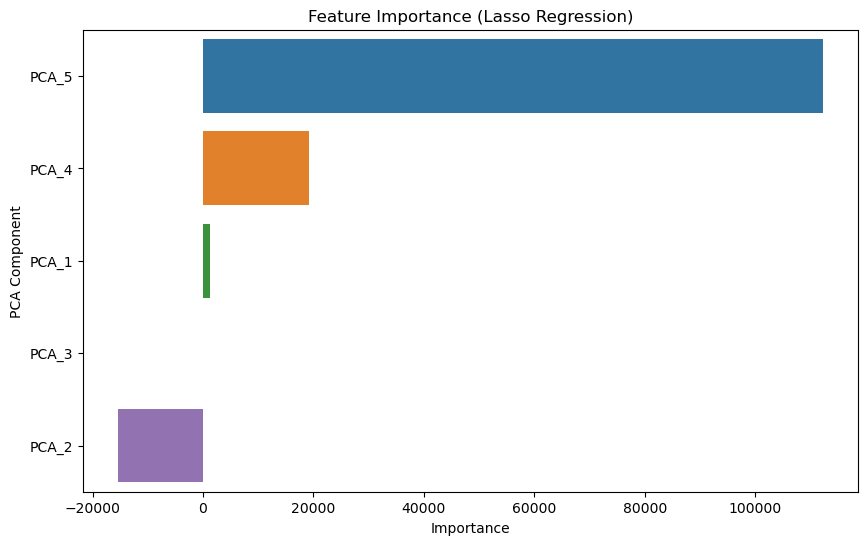

In [19]:
# Feature Importance
pca_components = ['PCA_' + str(i) for i in range(1, 6)]
coefficients = pd.Series(lasso_model.coef_, index=pca_components)
feature_importance = pd.DataFrame({'PCA Component': pca_components, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='PCA Component', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('PCA Component')
plt.title('Feature Importance (Lasso Regression)')
plt.show()

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


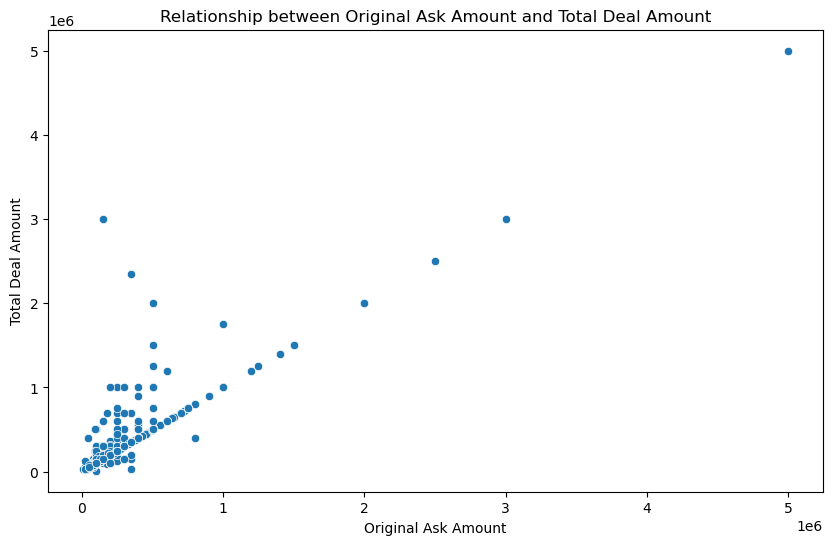

In [20]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Original Ask Amount', y='Total Deal Amount', data=data)
plt.xlabel('Original Ask Amount')
plt.ylabel('Total Deal Amount')
plt.title('Relationship between Original Ask Amount and Total Deal Amount')
plt.show()


C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


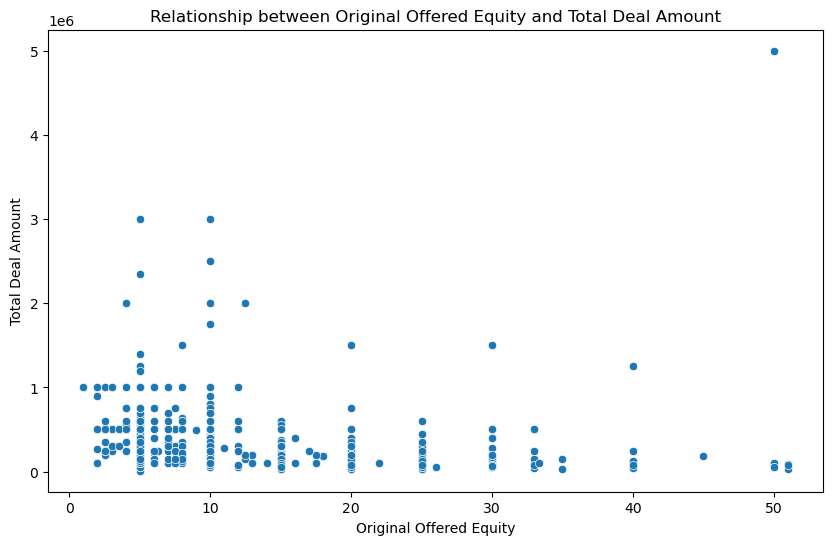

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Original Offered Equity', y='Total Deal Amount', data=data)
plt.xlabel('Original Offered Equity')
plt.ylabel('Total Deal Amount')
plt.title('Relationship between Original Offered Equity and Total Deal Amount')
plt.show()

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


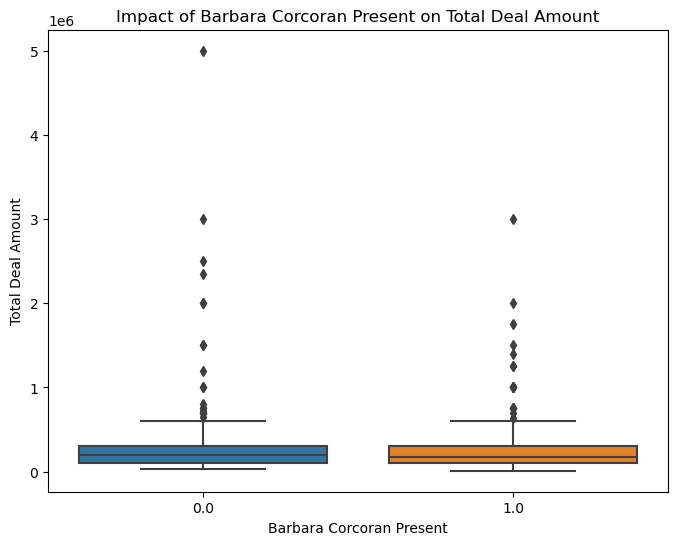

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


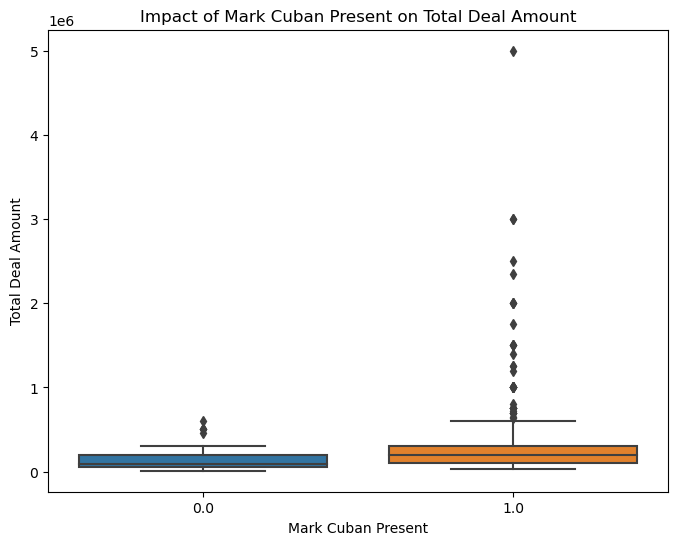

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


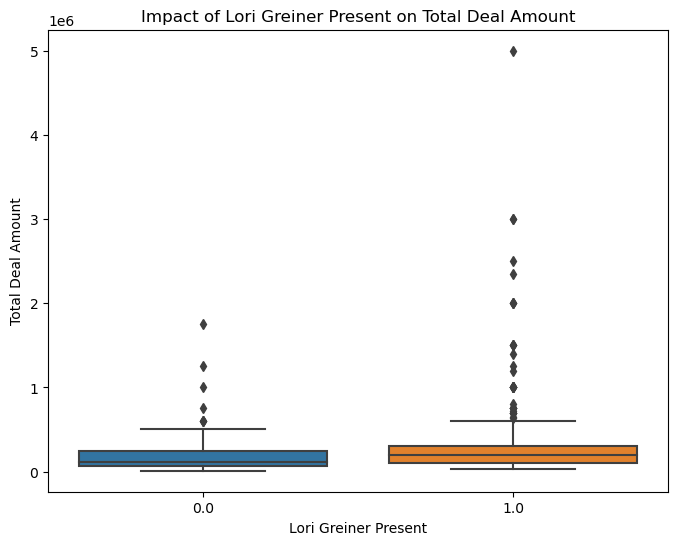

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


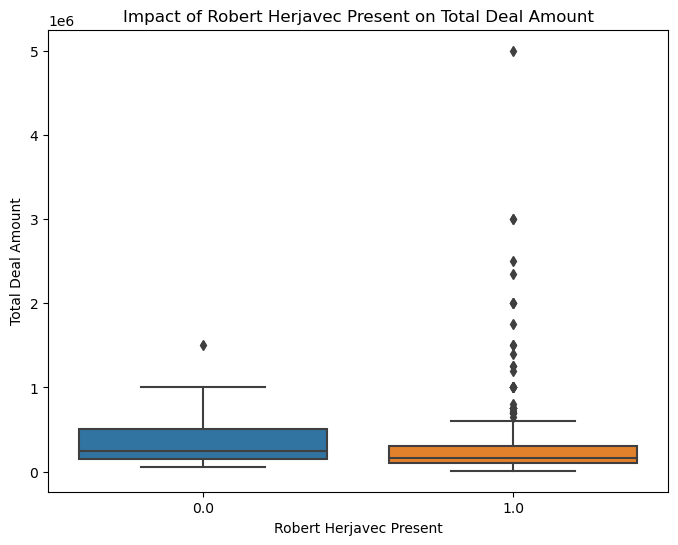

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


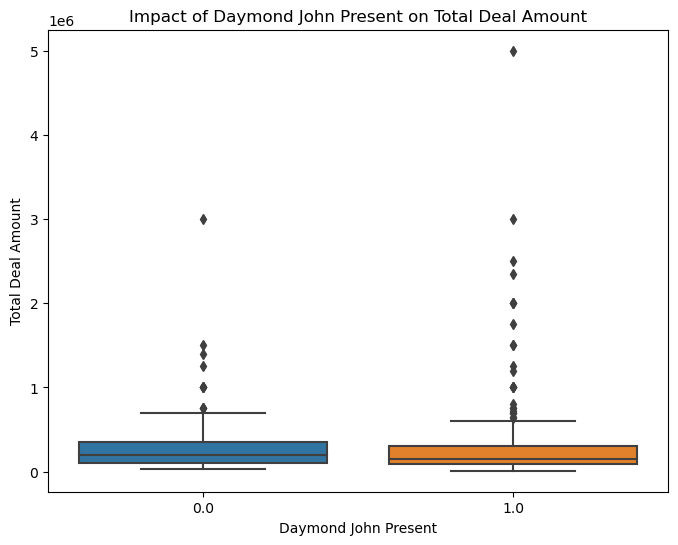

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


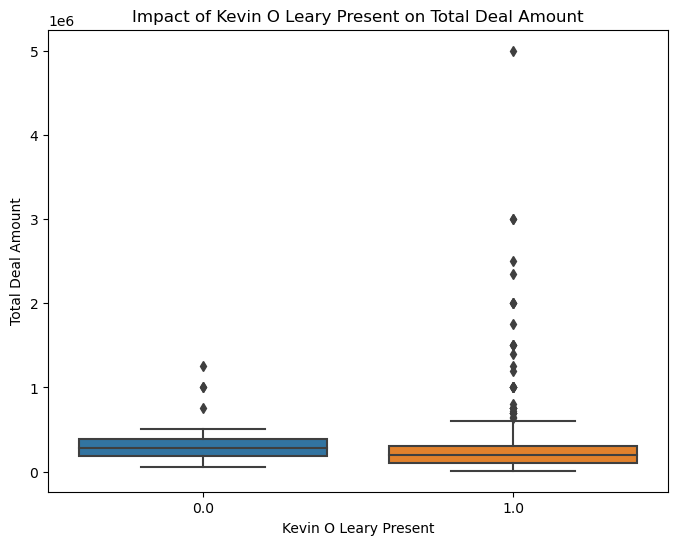

In [22]:
shark_columns = ['Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present',
                 'Robert Herjavec Present', 'Daymond John Present', 'Kevin O Leary Present']

for column in shark_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, y='Total Deal Amount', data=data)
    plt.xlabel(column)
    plt.ylabel('Total Deal Amount')
    plt.title(f'Impact of {column} on Total Deal Amount')
    plt.show()

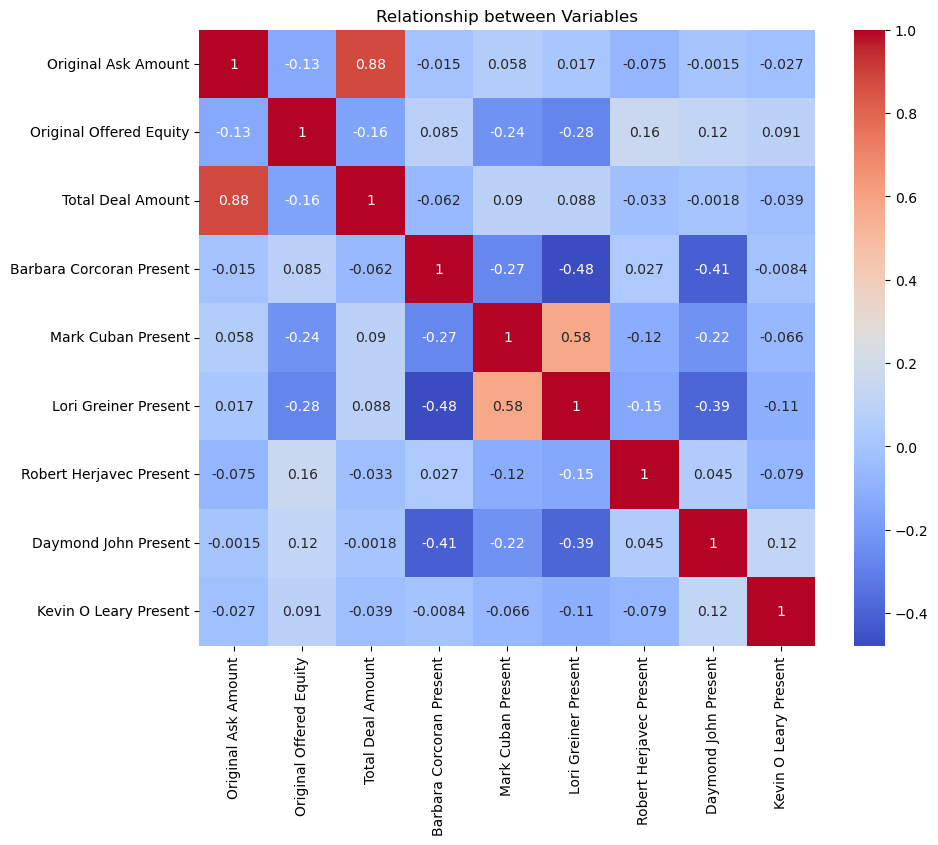

In [23]:
# Correlation Analysis
correlation_matrix = data[['Original Ask Amount', 'Original Offered Equity', 'Total Deal Amount'] + shark_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Relationship between Variables')
plt.show()

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\charl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


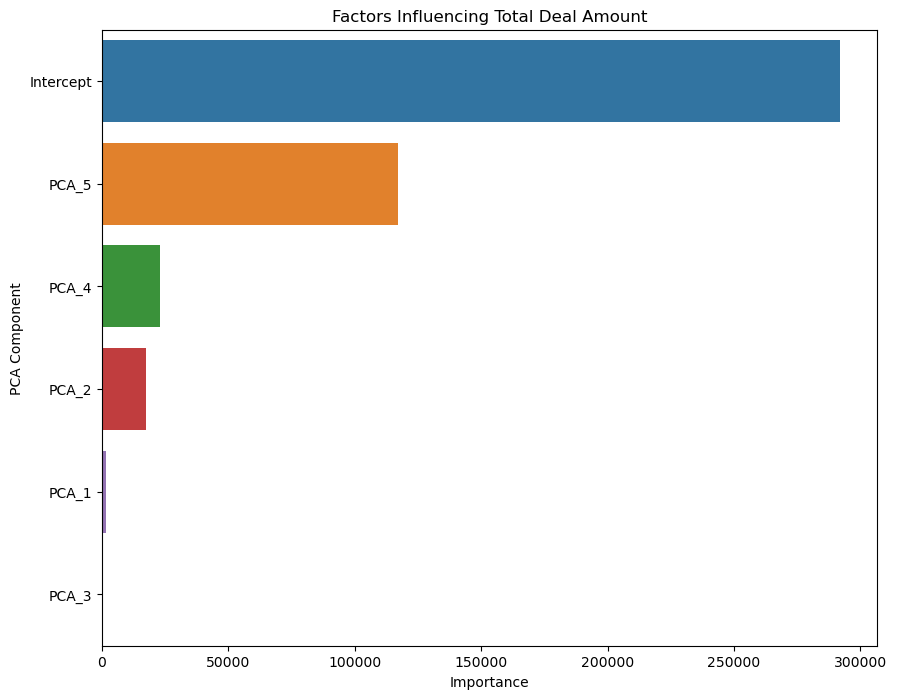

In [24]:
# Regression Coefficients
pca_components = ['Intercept'] + ['PCA_' + str(i+1) for i in range(X_pca.shape[1])]
regression_coefficients = pd.DataFrame({'PCA Component': pca_components,
                                        'Coefficient': [model.intercept_] + list(model.coef_)})
regression_coefficients['Absolute Coefficient'] = regression_coefficients['Coefficient'].abs()
regression_coefficients = regression_coefficients.sort_values(by='Absolute Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Absolute Coefficient', y='PCA Component', data=regression_coefficients)
plt.xlabel('Importance')
plt.ylabel('PCA Component')
plt.title('Factors Influencing Total Deal Amount')
plt.show()